# Breast Cancer Prediction with Logistic Regression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
import warnings
import numpy as np


from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
import joblib
from time import time

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from random import randint

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [5]:
df = pd.read_csv(r'C:\Users\Admin\Desktop\Projects\BreastCancer\breast_cancer.csv')
df.head()

,Class,Age,Menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


<Figure size 432x288 with 0 Axes>

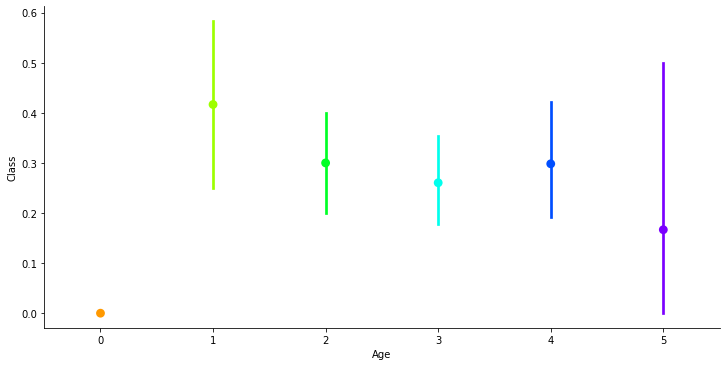

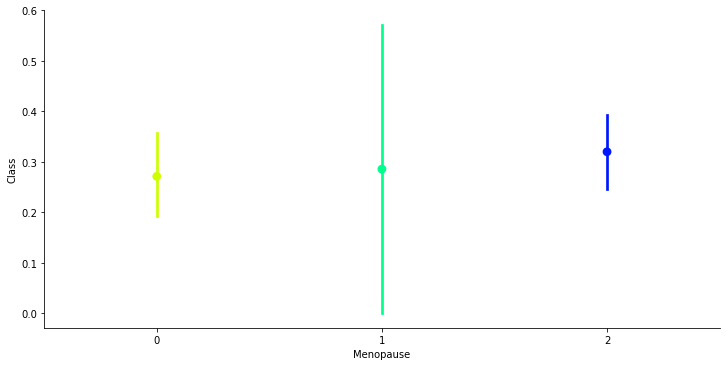

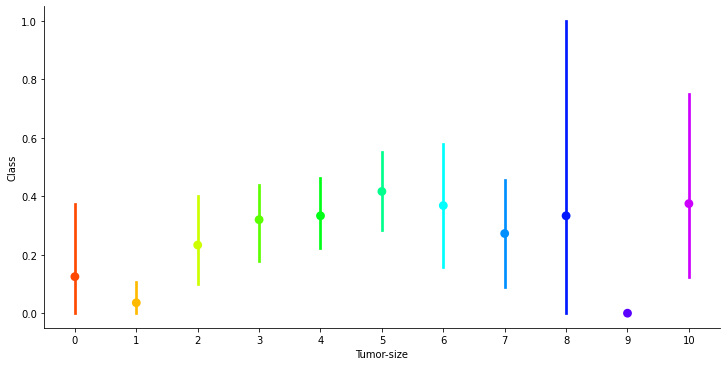

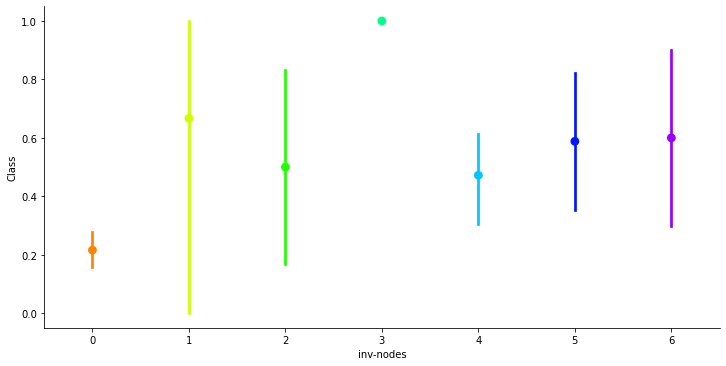

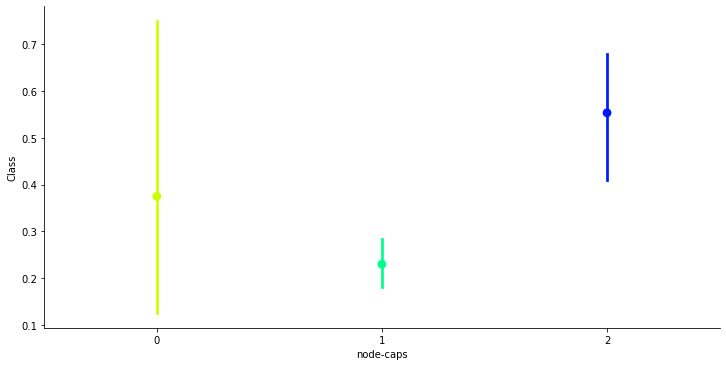

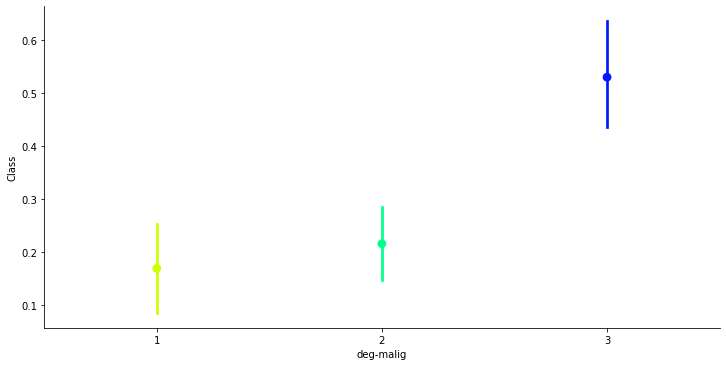

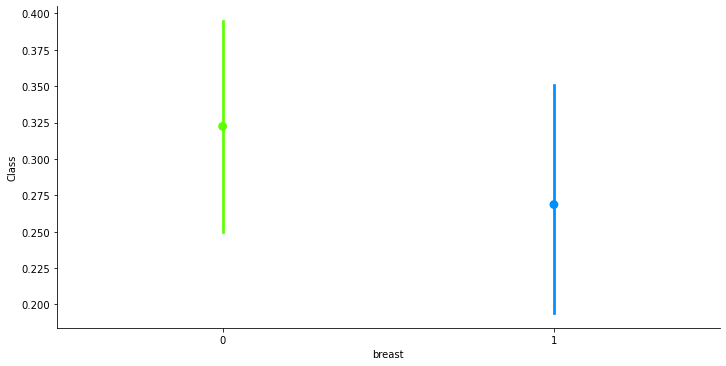

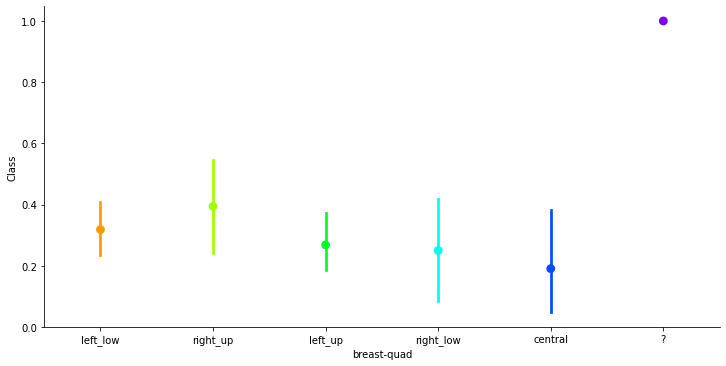

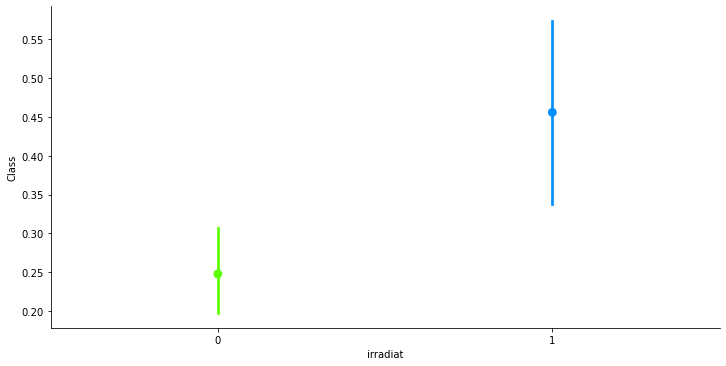

In [48]:
for i, col in enumerate(['Age', 'Menopause', 'Tumor-size', 'inv-nodes', 'node-caps', 'deg-malig', 'breast', 'breast-quad','irradiat']):
    plt.figure(i)
    sns.catplot(x=col, y="Class", data=df, kind='point', aspect=2, palette='gist_rainbow')

In [57]:
df.dtypes

Class            int8
Age              int8
Menopause        int8
Tumor-size       int8
inv-nodes        int8
node-caps        int8
deg-malig       int64
breast           int8
breast-quad    object
irradiat         int8
dtype: object

In [29]:
col_names = ['Class', 'Menopause', 'node-caps', 'breast', 'irradiat', 'Age', 'inv-nodes', 'Tumor-size']

for col in col_names:
    df[col] = df[col].astype('category', copy=False).cat.codes

In [30]:
df.isnull().sum()

Class          0
Age            0
Menopause      0
Tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

In [31]:
df.describe()

,Class,Age,Menopause,Tumor-size,inv-nodes,node-caps,deg-malig,breast,irradiat
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,0.297203,2.664336,1.073427,4.062937,1.073427,1.167832,2.048951,0.468531,0.237762
std,0.457828,1.011818,0.986680,2.151187,1.935321,0.443052,0.738217,0.499883,0.426459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,2.000000,0.000000,0.000000
75%,1.000000,3.000000,2.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000
max,1.000000,5.000000,2.000000,10.000000,6.000000,2.000000,3.000000,1.000000,1.000000


In [32]:
features=df.columns

In [33]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[1]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[1]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[1]))
fig.update_layout(showlegend=False)
fig.show()

In [34]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[2]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[2]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[2]))
fig.update_layout(showlegend=False)
fig.show()

In [35]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[3]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[3]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[3]))
fig.add_hline(y=df.groupby(by=features[1]).count()["Tumor-size"].mean(),row=1,col=2)
fig.update_layout(showlegend=False)
fig.show()

In [36]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[4]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[4]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[4]))
fig.add_hline(y=df.groupby(by=features[1]).count()["inv-nodes"].mean(),row=1,col=2)
fig.update_layout(showlegend=False)
fig.show()

In [37]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[5]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[5]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[5]))
fig.update_layout(showlegend=False)
fig.show()

In [38]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[6]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[6]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[6]))
fig.update_layout(showlegend=False)
fig.show()

In [39]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[7]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[7]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[7]))
fig.update_layout(showlegend=False)
fig.show()

In [40]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[8]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[8]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[8]))
fig.update_layout(showlegend=False)
fig.show()

In [41]:
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Box( y=df[features[9]]),row=1,col=1)
fig.add_trace(go.Histogram(x=df[features[9]]),row=1,col=2)
fig.update_layout(height=600, title_text="Boxplot and histogram for feature: "+str(features[9]))
fig.update_layout(showlegend=False)
fig.show()

In [42]:
df.to_csv ("cleaned_df.csv", index = False, header=True)

In [62]:
# creating one hot encoding of the categorical columns.
data = pd.get_dummies(df, columns =['breast-quad','Menopause', 'node-caps', 'breast', 'irradiat', 'Age', 'inv-nodes', 'Tumor-size'])


In [63]:
data.head()

,Class,deg-malig,breast-quad_?,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_right_low,breast-quad_right_up,Menopause_0,Menopause_1,...,Tumor-size_1,Tumor-size_2,Tumor-size_3,Tumor-size_4,Tumor-size_5,Tumor-size_6,Tumor-size_7,Tumor-size_8,Tumor-size_9,Tumor-size_10
0,0,3,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,2,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,2,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,2,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,0,2,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Develope Model

In [64]:
Y = df['Class']

In [65]:
X = data

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [67]:
x_train.shape, y_train.shape

((214, 42), (214,))

In [68]:
x_test.shape, y_test.shape

((72, 42), (72,))

Substantiate Model

In [69]:
classifier = LogisticRegression(solver='lbfgs',random_state=0)

In [72]:
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [74]:
LogisticRegression(C = 1.0, class_weight = None, dual = False, 
   fit_intercept=True, intercept_scaling=1, max_iter=100, 
   multi_class='warn', n_jobs=None, penalty='l2', random_state=0, 
   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', random_state=0)

In [76]:
predicted_y = classifier.predict(x_test)

In [77]:
predicted_y

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0], dtype=int8)

In [78]:
for x in range(len(predicted_y)):
   if (predicted_y[x] == 1):
      print(x, end="\t")

1	5	7	14	16	20	21	23	25	26	27	34	38	39	40	43	45	53	56	59	61	62	64	70	

In [80]:
print('Accuracy: {:.2f}'.format(classifier.score(x_test, y_test)))

Accuracy: 1.00


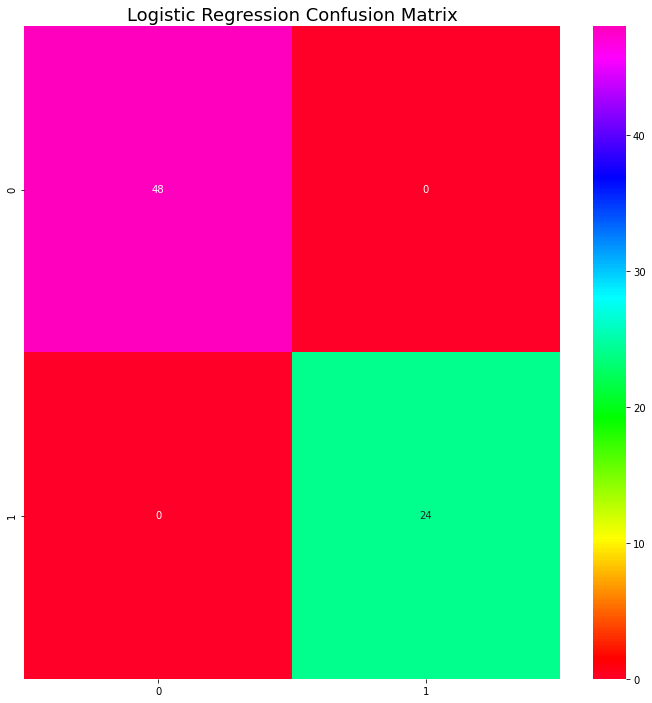

In [85]:
# creating a confusion matrix
cm = confusion_matrix(y_test, predicted_y)

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (12, 12)
sns.heatmap(cm, annot = True, cmap = 'gist_rainbow')
plt.title('Logistic Regression Confusion Matrix', fontweight = 25, fontsize = 18)
plt.show()

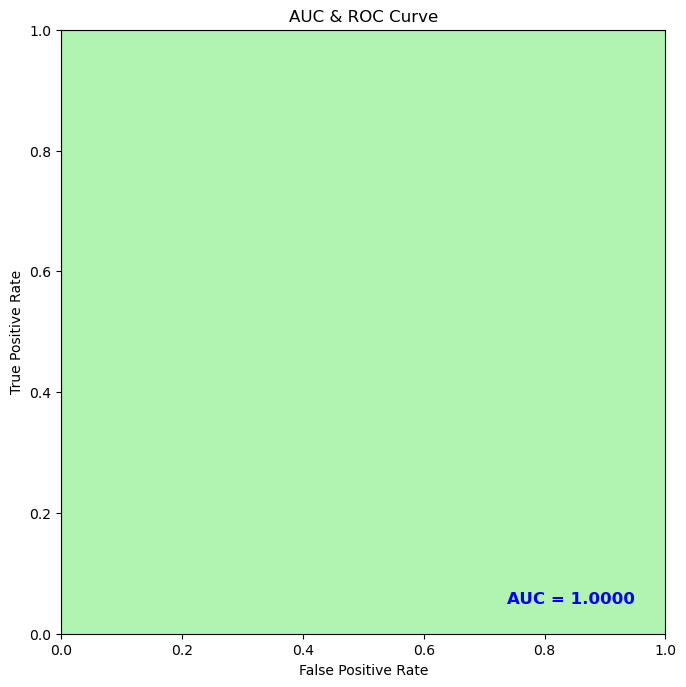

In [86]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, predicted_y)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, predicted_y)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

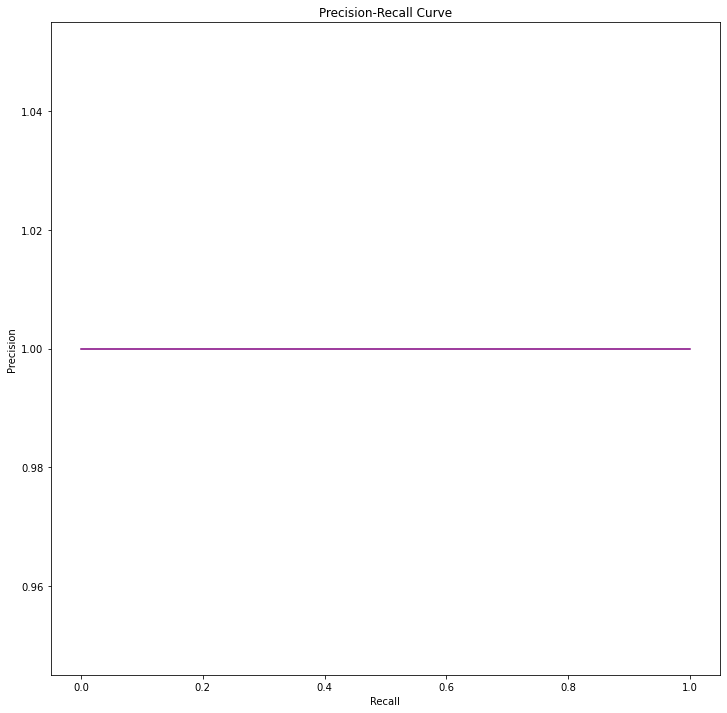

In [90]:
from sklearn.metrics import precision_recall_curve

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, predicted_y)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [91]:
from sklearn.metrics import classification_report

target_names = ['y_test', 'predicted_y'] # target values

# Print classification report after a train/test split:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      y_test       1.00      1.00      1.00        48
 predicted_y       1.00      1.00      1.00        24

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

